#1.モデルの準備

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import random
import os

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

import tensorflow as tf
import tensorflow_hub as hub

def set_seed(seed=1):
    tf.random.set_seed(seed)
    # optional
    # for numpy.random
    np.random.seed(seed)
    # for built-in random
    random.seed(seed)
    # for hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed(1)

print('TF version:', tf.__version__)
print('Hub version:', hub.__version__)
print('Phsical devices:', tf.config.list_physical_devices())

TF version: 2.7.0
Hub version: 0.12.0
Phsical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#2.データセットの準備

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset準備
from tensorflow._api.v2 import image
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
image_size = 224
batch_size = 1

In [ ]:
data_dir = "/content/drive/MyDrive/techno_pro/data/train/"
    
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
dataflow_kwargs = dict(target_size=(image_size, image_size),
                       batch_size=batch_size,
                       interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

do_data_augmentation = False #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)

Found 920 images belonging to 2 classes.
Found 3680 images belonging to 2 classes.


#保存済みモデルの使用

In [ ]:
model_path = '1641278891_efficientnetv2-b0_32batch_5epoch' # @param ['1641131363_efficientnetv2-b3_32batch_2epoch', '1641184059_efficientnetv2-s_8batch_5epoch', '1641275676_efficientnetv2-s_16batch_5epoch', '1641278891_efficientnetv2-b0_32batch_5epoch']
export_path = './drive/MyDrive/techno_pro/saved_model/' + model_path
reloaded = tf.keras.models.load_model(export_path)

true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  0
true index:  1


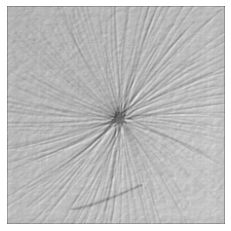

In [ ]:
while(True):
  x, y = next(train_generator)
  image = x[0, :, :, :]
  true_index = np.argmax(y[0])
  print("true index: ", true_index)
  if true_index == 1:
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    image = np.expand_dims(image, axis=0)
    break

In [ ]:
import time

In [ ]:
start = time.time()
prediction_scores = reloaded.predict(image)
end = time.time()
print("prediction time: ", end-start)

prediction time:  0.11656880378723145


In [ ]:
predicted_index = np.argmax(prediction_scores)
print("True label: " + str(true_index))
print("Predicted label: " + str(predicted_index))

True label: 1
Predicted label: 1
